<font color="#483D8B">
<h1  align="left">     Lab 2</h1>
<div align="left">
<font size=3><b>
<br>INET4710 Lab 2
<br>Kevin Yang
<br>January 31, 2019
<br></font></b></div>


---------------

## Overview

This lab details practice materials for Python and Spark. It covers the different functions for programming in Python and Spark for data science.  

References and links for the data are derived from the lab document:
1. https://docs.google.com/document/d/1SLM3FLE8A-cpKoVaMmlkcY30URYQcFtoIAFL6_vnRYI/edit

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
import pandas as pd
from numpy.linalg import inv
import os
import sys
import pyspark
import pyspark.sql
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
from pyspark.sql.functions import col


## Data

Data for this lab can be found in the reference link above. It will only be utilized for a few questions and will not be the sole data source for this lab. 

In [2]:
pathname = r"C:\Users\k\Desktop\DataSci2\Lab2\names\\"

Question 1.  
Write a lambda function to multiply two numbers together

lambda x,y: x*y

Question 2.  
Create a variable and assign to the lambda function definition from the previous question. Provide code that uses the variable to execute the lambda function (this is an example of functional programming).


In [3]:
mult = lambda x,y: x*y
print(mult(5,6))

30


Question 3.  
Write code to use a regular expression to search the word pig for the letter i and replace the letter i with three i’s. Include all code needed to run the example and print out the result.

In [4]:
line_1 = "pig"
match = re.sub(r"i","iii",line_1)
if match:
    print(match)
else:
    print('not found')

piiig


Question 4. 
Create a 3 x 3 identity matrix (ones on diagonal; zeros otherwise)
Display the shape of the matrix.

In [5]:
mat = np.matlib.identity(3,int)
np.fill_diagonal(mat,1)
mat


matrix([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

Question 5.  
Write code to  
1.       multiply the a matrix by 2 and then
2.       add matrix a and matrix b together.
Output the result of each operation.

In [6]:
a = np.ones((2,3), dtype=int)
b = np.random.random((2,3))

a = a*2
result = a+b
result

array([[2.0027073 , 2.74734145, 2.93229399],
       [2.58742619, 2.10833094, 2.3033389 ]])

Question 6.  
Write code to
     1. create a 3 by 4 matrix and initialize with random numbers between 0 and 1
     2. Calculate the mean of all the matrix elements.

In [7]:
c = np.random.random((3,4))
mn = np.mean(c)
mn

0.5271762958831692

Question 7.  
Using matrix a (below) and the axis parameter, write code to                        

In [8]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

1.   Sum each column

In [9]:
first_col = sum(a[0:3,0])    #a[0,0] + a[1,0] + a[2,0]
sec_col = sum(a[0:3,1])
third_col = sum(a[0:3,2])
fourth_col = sum(a[0:3,3])
print("first column total: ",first_col)
print("second column total: ",sec_col)
print("third column total: ",third_col)
print("fourth column total: ",fourth_col)

first column total:  12
second column total:  15
third column total:  18
fourth column total:  21


In [10]:
#sum of each column stored in a matrix/array
tot = a.sum(0)
tot

array([12, 15, 18, 21])

2.   Find the minimum of each row

In [11]:
row_1 = min(a[0])    #a[0,0] + a[1,0] + a[2,0]
row_2 = min(a[1])
row_3 = min(a[2])
print("Minimum of the first row: ",row_1)
print("Minimum of the second row: ",row_2)
print("Minimum of the third row: ",row_3)


Minimum of the first row:  0
Minimum of the second row:  4
Minimum of the third row:  8


In [12]:
#minimum of each row stored in a matrix/array
min_1 = a.min(1)
min_1

array([0, 4, 8])

3.   Calculate the cumulative sum along each row

In [13]:
cs = np.cumsum(a)
cs

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45, 55, 66], dtype=int32)

4.   Read the 3rd column of the 2nd row.

In [14]:
#value in the 3rd column of the 2nd row
val = a[1][2]
val

6

5.   Read the last row.

In [15]:
last_row = a[2]
last_row

array([ 8,  9, 10, 11])

Question 8.  
Using matrix a (below), write code to     

In [16]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

1.     create a boolean index that is true if a < 5. 

In [17]:
print(a<5)

[[ True  True  True  True]
 [ True False False False]
 [False False False False]]


2.     Then use the boolean matrix to select elements in matrix a that are less than five.
3.     Output the resulting matrix.

In [18]:
bool_mat = a[a<5]
bool_mat

array([0, 1, 2, 3, 4])

4.     What are the dimensions of the final matrix?

The dimensions of the final boolean matrix is 1-by-5.

Question 9.  
Using matrix a (below), write code to copy the matrix into a separate matrix with its own data (i.e., the variable is not a reference to matrix a).  

In [19]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [20]:
new_mat = a.copy()
new_mat


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

 Question 10.  
 Using matrices x and y (below), write code to   

In [21]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

1.       Calculate the transpose of x

In [22]:
np.transpose(x)

array([[1., 4.],
       [2., 5.],
       [3., 6.]])

2.       Multiple matrix x by y (using the dot operator) and save the result in z

In [23]:
z = np.dot(x,y)
z

array([[ 28.,  64.],
       [ 67., 181.]])

3.       Calculate the inverse of z

In [24]:
inv(z)

array([[ 0.23205128, -0.08205128],
       [-0.08589744,  0.03589744]])

## Exploratory Data Analysis

Question 11.  Execute the code (below) to display the plot.

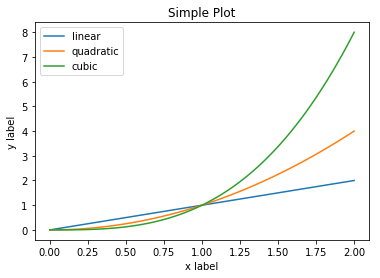

In [25]:
x = np.linspace(0, 2, 100)
 
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
 
plt.xlabel('x label')
plt.ylabel('y label')
 
plt.title("Simple Plot")
 
plt.legend()
 
plt.show()

A plot displaying three different graphs: linear, quadratic and cubic.

Question 12.  
Include the code (below) and add code to output the bar chart.

['Emma', 'Olivia', 'Noah', 'Liam', 'Sophia', 'Ava', 'William', 'Mason', 'Isabella', 'Jacob']


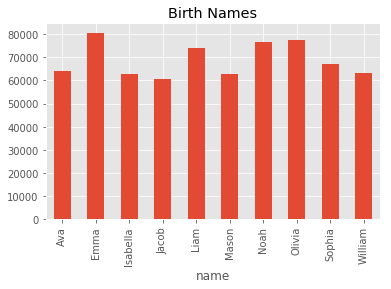

In [26]:
df_pieces = []
pathname = r"C:\Users\kyang\Desktop\DataSci2\Lab2\names\\"
 
years = range(2014, 2018)
for year in years:
      df_year = pd.read_csv(pathname + "yob" + str(year) + ".txt", names=['name', 'sex', 'births'])
      df_year['year'] = year
      df_pieces.append(df_year)
 
names = pd.concat(df_pieces, ignore_index=True)
 
 
# output a few lines of one of the data frames
df_year.head()
 
# sum births by gender
names.groupby('sex')['births'].sum()
 
type(names)
names.index
n = names.groupby('name')['births'].sum()
type(n)
# note a hierarchical index was created
n.index
# recreate a flat index
n1 = n.reset_index(name='birthcount')
 
# top 10 birth names
top10 = n1.sort_values(by='birthcount', ascending=False)[:10]
 
# select the name column converts the dataframe to a series
# which can be converted to a list         
top10['name']
type(top10['name'])
l_top10 = top10['name'].tolist()
print(l_top10)

 
 
# select the births for names in the top 10 list
df_top10 = names[names['name'].isin(l_top10)]
# select name and birth count columns
df_top10births = df_top10[['name','births']]
 
# sum births for each name
df_top10sum = df_top10.groupby('name')['births'].sum()
df_top10sum = df_top10sum.reset_index(name='births')
 
# create bar chart
plt.style.use('ggplot')
df_top10sum.plot(kind="bar",x="name", #df_top10sum["name"],
                          title="Birth Names",
                          legend=False)
plt.gcf().subplots_adjust(bottom=0.2)


This bar chart displays the top 10 birth names. We can see that Emma has the highest selection followed by Olivia. 
Jacob is the least popular among the top 10 birth names. 

Question 13.  Include the code (below) and display the top 10 names.

In [27]:
spark_path = "C:\Spark\spark-2.3.2-bin-hadoop2.7"
 
os.environ['SPARK_HOME'] = spark_path
os.environ['HADOOP_HOME'] = spark_path
 
sys.path.append(spark_path + "\bin")
sys.path.append(spark_path + "\python")
sys.path.append(spark_path + "\python\pyspark")
sys.path.append(spark_path + "\python\lib")
sys.path.append(spark_path + "\python\lib\pyspark.zip")
sys.path.append(spark_path + "\python\lib\py4j-0.10.7-src.zip")

spark = SparkSession.builder.master("local[*]").appName("lab1").getOrCreate()
sc = spark.sparkContext

In [28]:
# local[*]  Run Spark locally with as many worker threads
#           as logical cores on your machine
# getOrCreate() Gets an existing SparkSession or, if there
#           is no existing one, creates a new one based on the
#           options set in this builder

In [29]:
df_pieces = []
pathname = r"C:\Users\kyang\Desktop\DataSci2\Lab2\names\\"
 
years = range(2014, 2018)
for year in years:
    df_year = pd.read_csv(pathname + "yob" + str(year) + ".txt", names=['name', 'sex', 'births'])
    df_year['year'] = year
    df_pieces.append(df_year)
 
names = pd.concat(df_pieces, ignore_index=True)
 
# now for pandas dataframes with spark
 
# create spark dataframe from pandas dataframe
spark_df = spark.createDataFrame(names)
 
# persist the RDD in memory, allowing it to be reused efficiently across parallel operations
cached = spark_df.persist()
 
spark_df.count()
spark_df.first()
 
names.shape
 
spark_df.columns
spark_df.printSchema()
 
# find Emma names
n = spark_df.filter(cached.name == 'Emma')
n.show()
 
# top 10
# returns a list type
 
top10 = spark_df[['name','births']].groupBy('name').sum().sort(col('sum(births)').desc()).limit(10).show()
top10

root
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- births: long (nullable = true)
 |-- year: long (nullable = true)

+----+---+------+----+
|name|sex|births|year|
+----+---+------+----+
|Emma|  F| 20924|2014|
|Emma|  M|    12|2014|
|Emma|  F| 20435|2015|
|Emma|  M|    10|2015|
|Emma|  F| 19471|2016|
|Emma|  M|    18|2016|
|Emma|  F| 19738|2017|
|Emma|  M|    14|2017|
+----+---+------+----+

+--------+-----------+
|    name|sum(births)|
+--------+-----------+
|    Emma|      80622|
|  Olivia|      77476|
|    Noah|      76855|
|    Liam|      73840|
|  Sophia|      67010|
|     Ava|      64290|
| William|      63417|
|   Mason|      62850|
|Isabella|      62599|
|   Jacob|      60459|
+--------+-----------+



Question 14.  Write code to select the count of distinct names in the spark_df data frame.

In [30]:
#cnt_dst_name = spark_df.groupby(spark_df['name']).count().show()
cnt_dst_name = spark_df.distinct().count()
cnt_dst_name

131774

Question 15.  Write code to count the names born in 2016 in the spark_df data frame.

In [31]:
#num_names = spark_df.filter(spark_df['year'] == 2016).sum().show()
#num_names
#num_names = spark_df['name','year'].where(spark_df['year'] == 2016).collect()

num_names = spark_df['name','year'].filter(func.col('year') == 2016).groupBy('name').count().show()

#total = num_names.count(axis='name')
num_names
#total

+---------+-----+
|     name|count|
+---------+-----+
|   Alayna|    1|
|    Ember|    2|
|   Heaven|    2|
|  Galilea|    1|
|   Azalea|    1|
|     Faye|    1|
|    Kiana|    1|
|    Tegan|    2|
| Julianne|    1|
|  Susanna|    1|
|    Tyler|    2|
|  Jazzlyn|    1|
|   Kenlee|    2|
|   Maddox|    2|
| Analeigh|    1|
|     Kloe|    1|
|     Nell|    1|
|   Ishani|    1|
|Amaryllis|    1|
|   Britta|    1|
+---------+-----+
only showing top 20 rows



## Conclusion

Although the purpose of this lab is to mainly practice Python and Spark programming, it has been very helpful as a "first step" into Big Data. This lab will definitely be utilized further for more practice and assistance with future assignments.  